In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

food_data = pd.read_csv(r"datasets/food_data.csv")

ratings_data = pd.read_csv(r"datasets/ratings.csv")

DATA PREPROCESSING AND EXPLORATION

FOOD_DATASET

In [2]:
food_data.shape

(400, 5)

In [3]:
food_data['Food_ID'].value_counts()

Food_ID
1      1
264    1
274    1
273    1
272    1
      ..
131    1
130    1
129    1
128    1
400    1
Name: count, Length: 400, dtype: int64

In [6]:
food_data['Food_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
print("Dataset Overview:")
food_data.head()

Dataset Overview:


,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [16]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [20]:
food_data['C_Type'].value_counts()

C_Type
Indian          88
Healthy Food    58
Dessert         53
Chinese         27
Italian         25
Snack           23
Thai            23
French          22
Mexican         21
Japanese        18
Beverage        11
Nepalese        11
Korean           9
Vietnames        9
 Korean          1
Spanish          1
Name: count, dtype: int64

In [21]:
food_data['Veg_Non'].value_counts()

Veg_Non
veg        238
non-veg    162
Name: count, dtype: int64

In [22]:
print("\nMissing Values:\n")
food_data.isnull().sum()


Missing Values:



Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

C:\Users\raksh\AppData\Local\Temp\ipykernel_30232\3499333592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='C_Type', data=food_data, palette='Set3')


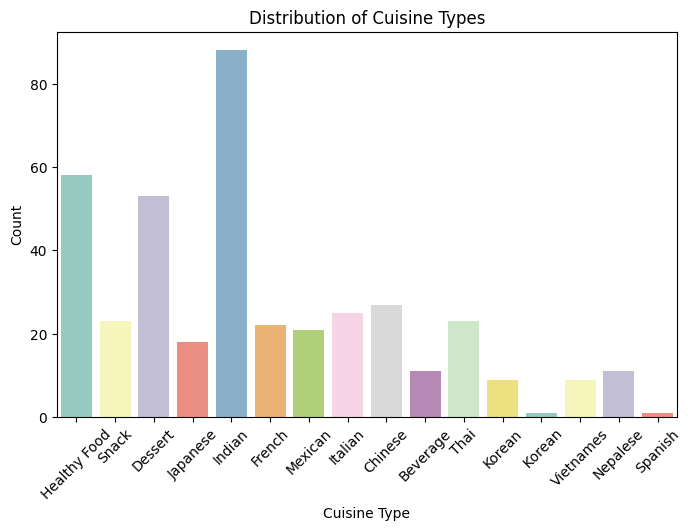

C:\Users\raksh\AppData\Local\Temp\ipykernel_30232\3499333592.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Veg_Non', data=food_data, palette='coolwarm')


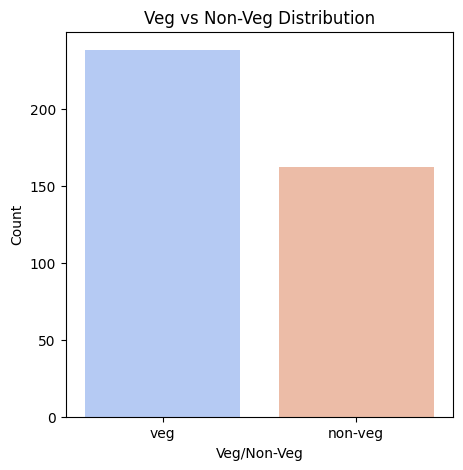

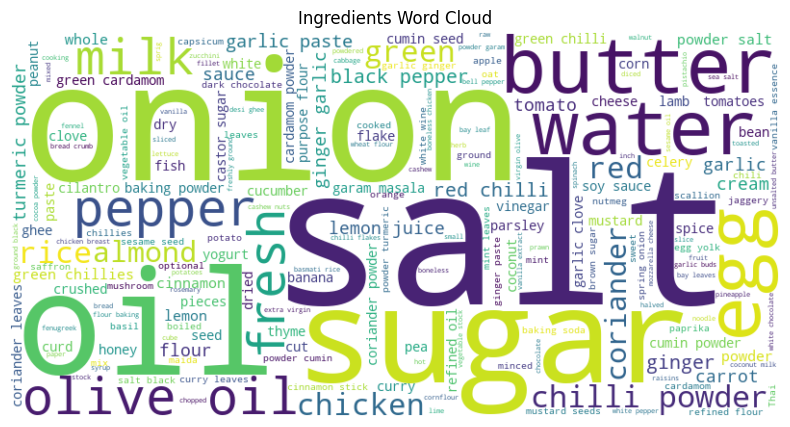

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.countplot(x='C_Type', data=food_data, palette='Set3')
plt.title("Distribution of Cuisine Types")
plt.xlabel("Cuisine Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 5))
sns.countplot(x='Veg_Non', data=food_data, palette='coolwarm')
plt.title("Veg vs Non-Veg Distribution")
plt.xlabel("Veg/Non-Veg")
plt.ylabel("Count")
plt.show()

from wordcloud import WordCloud

describe_text = " ".join(food_data['Describe'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(describe_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ingredients Word Cloud")
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
food_data['C_Type_encoded'] = le.fit_transform(food_data['C_Type'])
food_data['Veg_Non_encoded'] = le.fit_transform(food_data['Veg_Non'])

print(food_data[['C_Type', 'C_Type_encoded', 'Veg_Non', 'Veg_Non_encoded']].head())


         C_Type  C_Type_encoded  Veg_Non  Veg_Non_encoded
0  Healthy Food               5      veg                1
1  Healthy Food               5  non-veg                0
2         Snack              12      veg                1
3  Healthy Food               5      veg                1
4       Dessert               3      veg                1


In [10]:
ratings_data.shape

(512, 3)

RATINGS_DATASET

In [7]:
import pandas as pd
ratings_data = pd.read_csv(r"datasets/ratings.csv")

print("Ratings Data Overview:")
print(ratings_data.head())




Ratings Data Overview:
   User_ID  Food_ID  Rating
0      1.0     88.0     4.0
1      1.0     46.0     3.0
2      1.0     24.0     5.0
3      1.0     25.0     4.0
4      2.0     49.0     1.0


In [8]:
ratings_data['User_ID'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.,  nan])

In [11]:
ratings_data.describe()

,User_ID,Food_ID,Rating
count,511.000000,511.000000,511.000000
mean,49.068493,125.311155,5.438356
std,28.739213,91.292629,2.866236
min,1.000000,1.000000,1.000000
25%,25.000000,45.500000,3.000000
50%,49.000000,111.000000,5.000000
75%,72.000000,204.000000,8.000000
max,100.000000,309.000000,10.000000


In [12]:
ratings_data['User_ID'] = ratings_data['User_ID'].astype('Int64')
ratings_data['Food_ID'] = ratings_data['Food_ID'].astype('Int64')

print("Updated Ratings Data:")
print(ratings_data)

Updated Ratings Data:
     User_ID  Food_ID  Rating
0          1       88     4.0
1          1       46     3.0
2          1       24     5.0
3          1       25     4.0
4          2       49     1.0
..       ...      ...     ...
507       99       22     1.0
508      100       24    10.0
509      100      233    10.0
510      100       29     7.0
511     <NA>     <NA>     NaN

[512 rows x 3 columns]


In [13]:
user_id_counts = ratings_data['User_ID'].value_counts()
print(user_id_counts)

User_ID
62    11
32    11
36    10
31    10
54    10
      ..
58     2
66     2
65     2
72     2
40     1
Name: count, Length: 100, dtype: Int64


In [14]:
print("\nDataset Info:")
print(ratings_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    Int64  
 1   Food_ID  511 non-null    Int64  
 2   Rating   511 non-null    float64
dtypes: Int64(2), float64(1)
memory usage: 13.1 KB
None


In [73]:
ratings_data.shape

(512, 3)

In [15]:
missing_rows = ratings_data[ratings_data['Rating'].isnull()]

print("\nRows with Missing Values in 'Rating':")
print(missing_rows)


Rows with Missing Values in 'Rating':
     User_ID  Food_ID  Rating
511     <NA>     <NA>     NaN


In [16]:

ratings_data.dropna(subset=['Rating'], inplace=True)


In [17]:
ratings_data.isnull().sum()

User_ID    0
Food_ID    0
Rating     0
dtype: int64

In [18]:
duplicate_rows = ratings_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

ratings_data = ratings_data.drop_duplicates()



Number of duplicate rows: 0


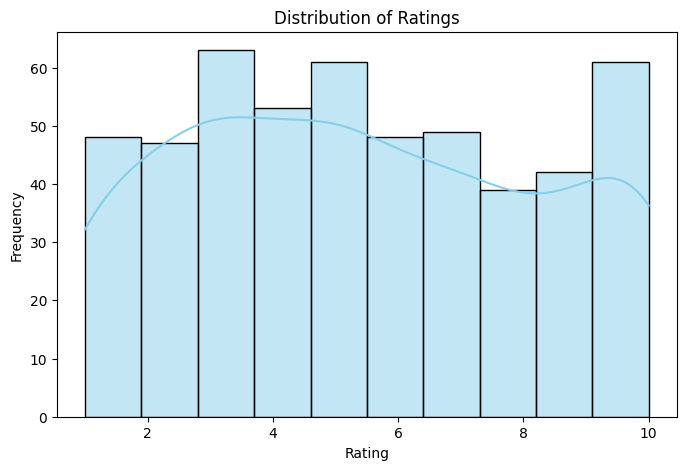

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(ratings_data['Rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [19]:
ratings_data.shape

(511, 3)

In [20]:

valid_ratings = ratings_data[(ratings_data['Rating'] >= 1) & (ratings_data['Rating'] <= 10)]

print(f"\nNumber of invalid ratings removed: {len(ratings_data) - len(valid_ratings)}")
ratings_data = valid_ratings



Number of invalid ratings removed: 0


In [21]:
ratings_data.shape

(511, 3)

In [84]:

ratings_data.to_csv("processed_ratings_data.csv", index=False)
print("\nPreprocessed ratings data saved!")

food_data.to_csv("processed_food_data.csv", index=False)
print("\nPreprocessed food data saved!")



Preprocessed ratings data saved!

Preprocessed food data saved!
